In [1]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import torch_geometric.data as data
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd 
import numpy as np

In [2]:
import networkx as nx 
# Load the network
df = pd.read_csv("prueba_gephi/Edges_una_clase_interno.csv")
df["weight"] = df["weight"].apply(lambda x: np.sign(x))
df[["source","target"]] = df[["source","target"]].apply(lambda x:x-df["source"].min())
G = nx.from_pandas_edgelist(df,create_using=nx.DiGraph())
pos = nx.spring_layout(G, center=[0.5, 0.5])
nx.set_node_attributes(G, pos, 'pos')

In [3]:
network = data.Data(edge_index=torch.tensor(df[["source","target"]].to_numpy().T))

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(network.edge_index, embedding_dim=128, walk_length=30,
             context_size=10, walks_per_node=10,
             num_negative_samples=1,
                 p=1, q=4,                             # bias parameters
                 sparse=True).to(device)

In [5]:
loader = model.loader(shuffle=True, num_workers=4)

[25, 22, 5, 13, 8, 0, 23, 23, 23, 23]
[13, 8, 7, 13, 19, 19, 19, 19, 19, 19]
[17, 2, 2, 2, 2, 2, 2, 2, 2, 2]


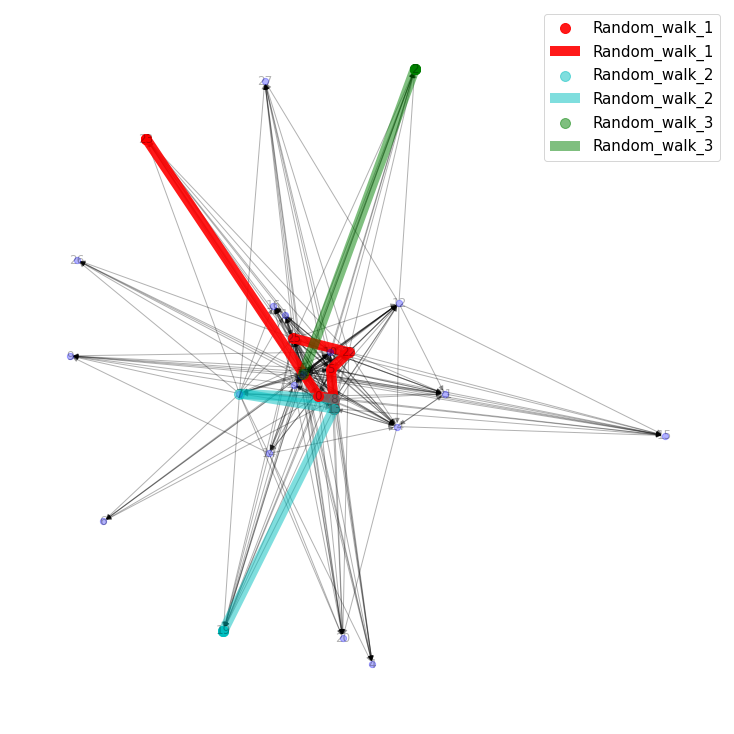

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])
#ax.set_title("Random Walks in a class",fontsize=20)
#ax = fig.add_subplot(1, 2, 1)
nx.draw_networkx(G, 
               ax=ax,
               pos=nx.get_node_attributes(G, 'pos'), 
               node_size=40,
               alpha=0.3,
               node_color='b')

nodelist = next(enumerate(loader))[1][0][0].tolist()
print(nodelist)
walk = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

nx.draw(walk, 
        node_size=100,
        node_color='r',
        alpha=0.9,
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'), 
        width=10,
        edge_color='r',label="Random_walk_1"
        )  

nodelist = next(enumerate(loader))[1][0][0].tolist()
print(nodelist)
walk_2 = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk_2, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

nx.draw(walk_2, 
        node_size=100,
        node_color='c',
        alpha=0.5,
        ax=ax,
        pos=nx.get_node_attributes(walk_2, 'pos'), 
        width=10,
        edge_color='c',label="Random_walk_2")

nodelist = next(enumerate(loader))[1][0][0].tolist()
print(nodelist)
walk_3 = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk_3, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

nx.draw(walk_3, 
        node_size=100,
        node_color='g',
        alpha=0.5,
        ax=ax,
        pos=nx.get_node_attributes(walk_3, 'pos'), 
        width=10,
        edge_color='g',label="Random_walk_3")
plt.legend(fontsize=15)
fig.savefig("Random_walks.jpg")
